# Data Decription
This dataset contains a survey on air passenger satisfaction. The following classification problem is set:

It is necessary to predict which of the two levels of satisfaction with the airline the passenger belongs to:

1-Satisfaction.

2-Neutral or dissatisfied.


# Import Libraries

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
%matplotlib inline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.metrics import confusion_matrix , roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

# Read Data File

In [165]:
df = pd.read_csv('Airline.csv')

In [166]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Check Null

First, i want to check if there is null values in my data

In [167]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

# Handle Null

Here we can see that the feature arrival delay in minutes have 310 null values which need to be handled.
first, i will visualize the distribution of this feature 

(0.0, 40.0)

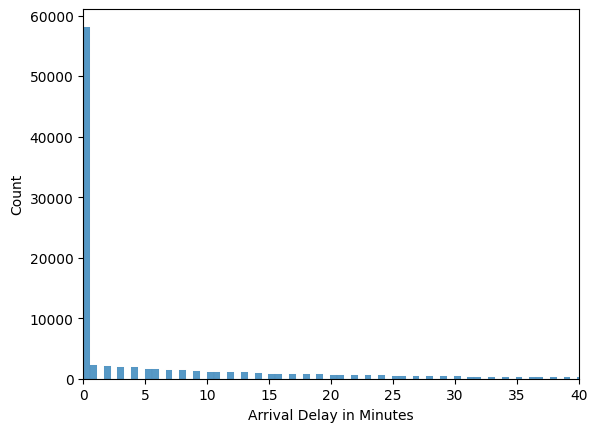

In [168]:
sns.histplot(data=df,x= 'Arrival Delay in Minutes')
plt.xlim(0,40)

Here we can see that most of the values are 0 , so we will replace this feature with the median

In [169]:
df['Arrival Delay in Minutes'].fillna(value=df['Arrival Delay in Minutes'].median(),inplace=True)

In [170]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Data Cleaning

I will drop the Unnamed:0 columns because it represents the index of the data

In [171]:
df.drop('Unnamed: 0',axis=1,inplace=True)

I will drop the id column because it doesnt make sense to affect the model

In [172]:
df.drop('id',axis=1,inplace=True)

In [173]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

# EDA

I want to visualise how many males and females are in my data

<Axes: xlabel='Gender', ylabel='count'>

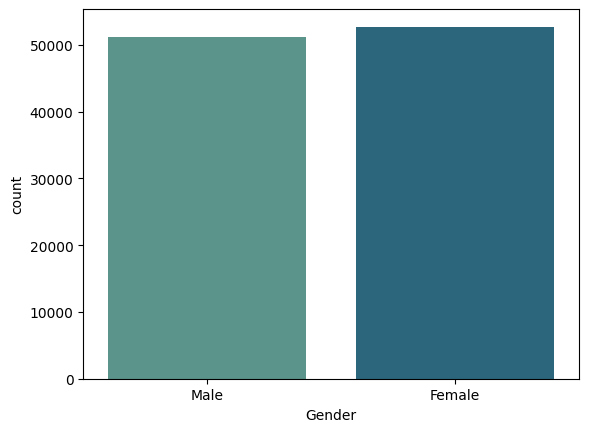

In [174]:
sns.countplot(data=df,x=df['Gender'],palette='crest')

<Axes: xlabel='Gender', ylabel='count'>

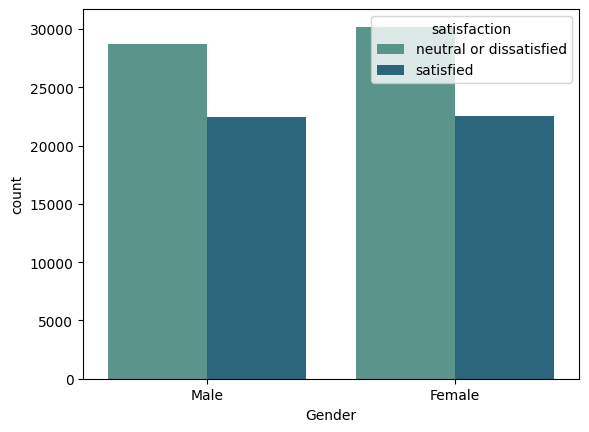

In [175]:
sns.countplot(df, x = "Gender", hue = "satisfaction", palette = "crest", linewidth = .5)

Here we can see that the amount of male satisfied and unsatisfied are almost the same as female satisfied and unsatisfied 

In [176]:
df['Gender'].value_counts()

Gender
Female    52727
Male      51177
Name: count, dtype: int64

As we can see, the number of females in our data is almost the same as the number of males

In [177]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

There are two types of customers: loyal and unloyal customers

<Axes: xlabel='Customer Type', ylabel='count'>

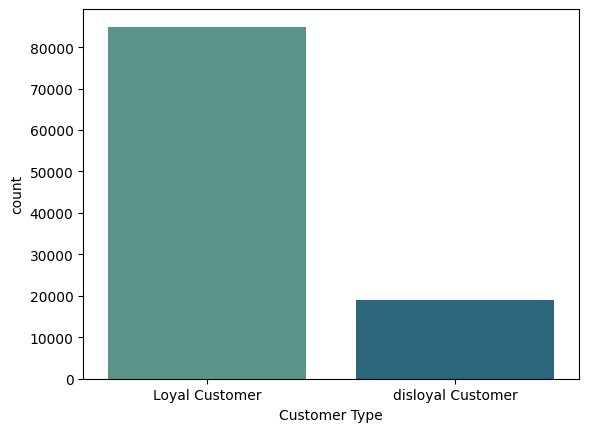

In [178]:
sns.countplot(data=df,x= df['Customer Type'],palette='crest')

<Axes: xlabel='Customer Type', ylabel='count'>

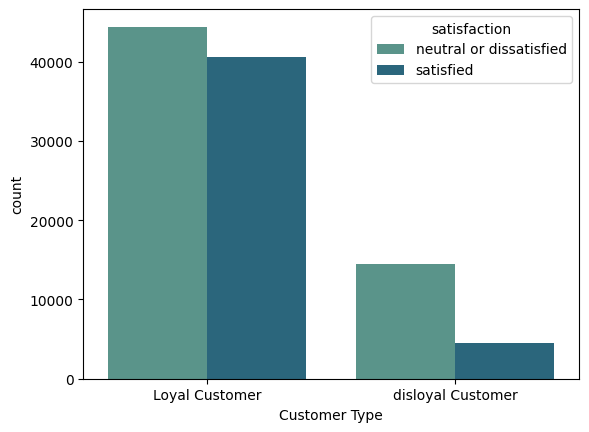

In [179]:
sns.countplot(df, x = "Customer Type", hue = "satisfaction", palette = "crest", linewidth = .5)

Here we can see that the amount of satisfied loyal customers are thee same as unsatisfied loyal customers,
While for unloyal customers tend to be unsatisfied or neutral rather than satisfied

<Axes: xlabel='Customer Type', ylabel='count'>

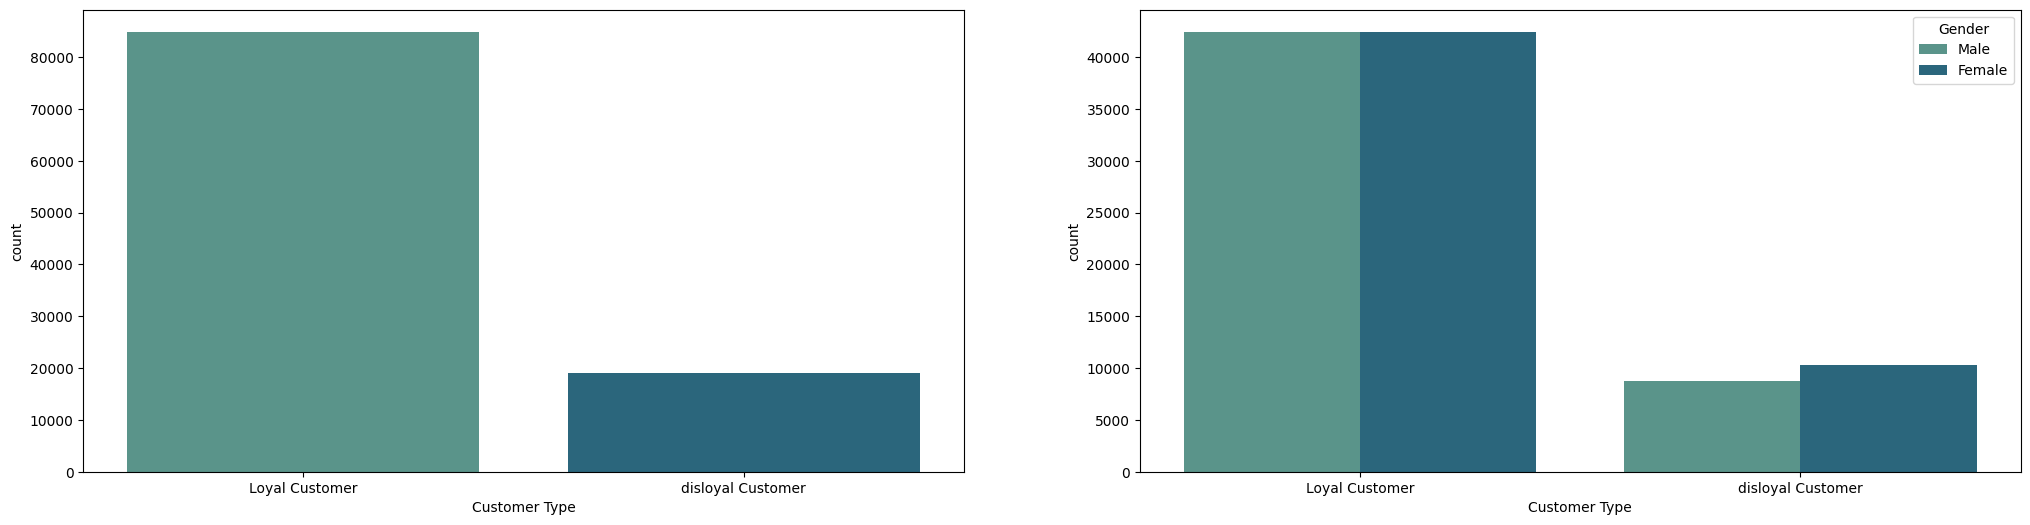

In [180]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(25, 6)
sns.countplot(x=df['Customer Type'],data=df,ax=axes[0],palette = "crest")
sns.countplot(data=df,x= df['Customer Type'],hue='Gender',ax=axes[1],palette='crest')

Most of the Customers Are Loyal

The visualization shows that the amount of male and female loyal customers are equal

<Axes: xlabel='Age', ylabel='Count'>

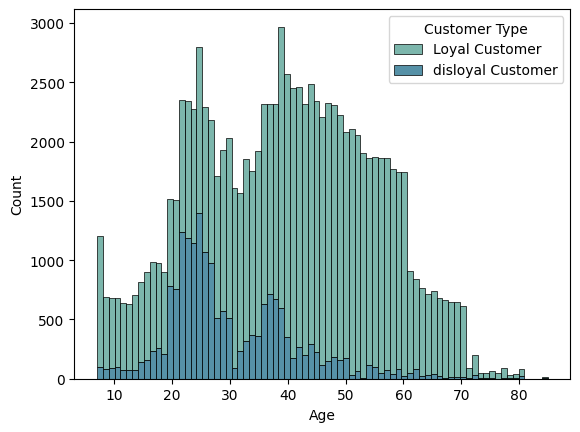

In [181]:
sns.histplot(df, x = "Age", hue = "Customer Type", palette = "crest",multiple = "stack", linewidth = .5)

From this graph, We can see that most loyal customers occur from age 30 to 50, While most of unloyal customers age from 20 to 30

<Axes: xlabel='Age', ylabel='Count'>

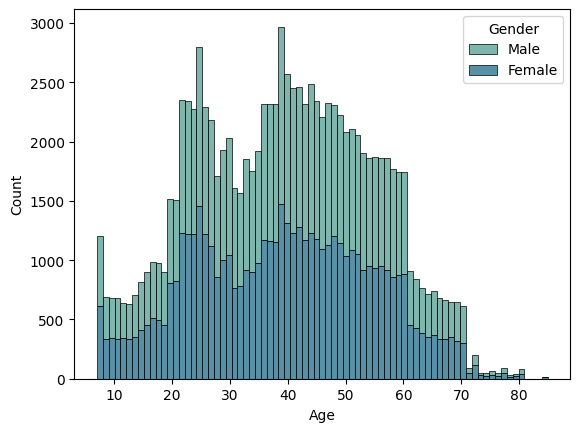

In [182]:
sns.histplot(df, x = "Age", hue = "Gender", palette = "crest",multiple = "stack", linewidth = .5)

Most of the Data in this model are concentrated between 20 and 60 years old almost equally distributed between male and female

In [183]:
#plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("crest"), autopct = '%1.1f%%');

<Axes: xlabel='Age', ylabel='Count'>

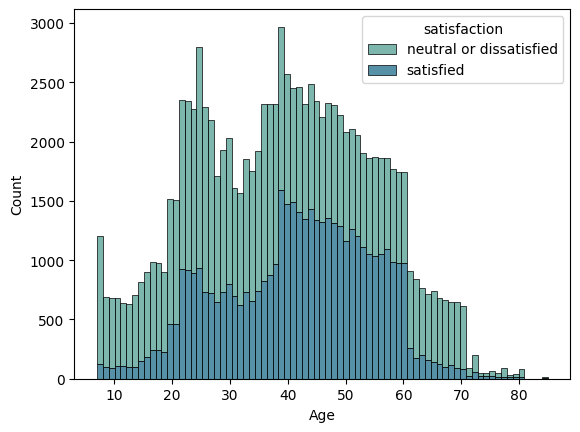

In [184]:
sns.histplot(df, x = "Age", hue = "satisfaction", palette = "crest",multiple = "stack", linewidth = .5)

Here we can visualize that neutral or unsatisfied people whose age are less than 25, are more than the satisfied


from age 25 to 40, the number of satisfied people are equal to the number of unsatisfied people


from the age 40 to 60, people tend to be more satisfied than neutral or unsatisfied


from above the age 60, people again tend to be more unsatified than people satisfied 

In [185]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

<Axes: xlabel='Type of Travel', ylabel='count'>

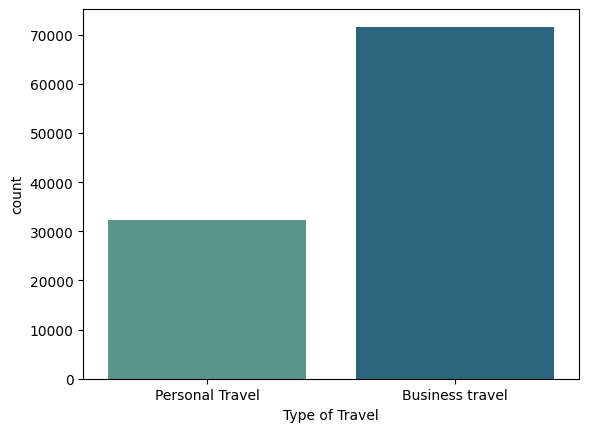

In [186]:
sns.countplot(x=df['Type of Travel'],data=df,palette = "crest")


This graph shows that the amount of people using this airline for business travel more than people using it for perosnal travel

<Axes: xlabel='Type of Travel', ylabel='count'>

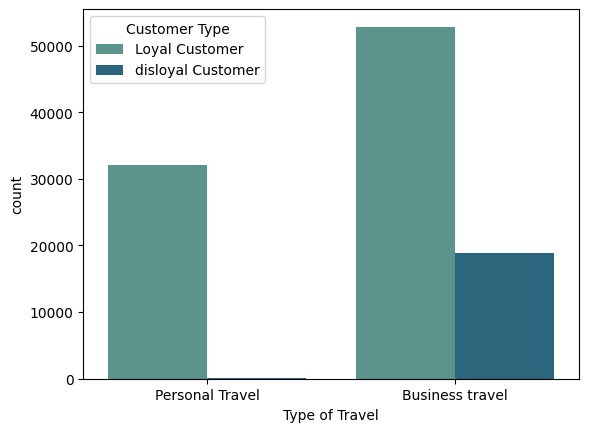

In [187]:
sns.countplot(x=df['Type of Travel'],hue='Customer Type',data=df,palette = "crest")


Here we can see that almost no disloyal customer is using this airline for personal travel. all of the disloyal customers using this plane use it for business travel

<Axes: xlabel='Type of Travel', ylabel='count'>

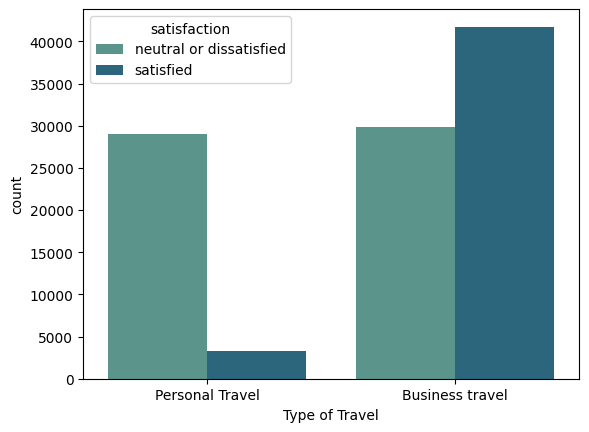

In [188]:
sns.countplot(x=df['Type of Travel'],hue='satisfaction',data=df,palette = "crest")


This plot shows that the number of dissatisfied peple using personal travel are much more than the satisfied people

The plot also shows that people using this airline for business travel tend to be more satisfied

In [189]:
df['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

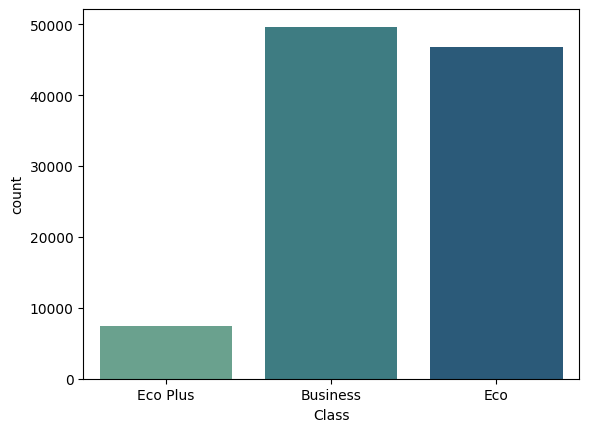

In [190]:
sns.countplot(x=df['Class'],data=df,palette = "crest")


Most of the people use the business class or eco rather than eco plus which makes sense because the amount of eco plus seats are limited

<Axes: xlabel='Class', ylabel='count'>

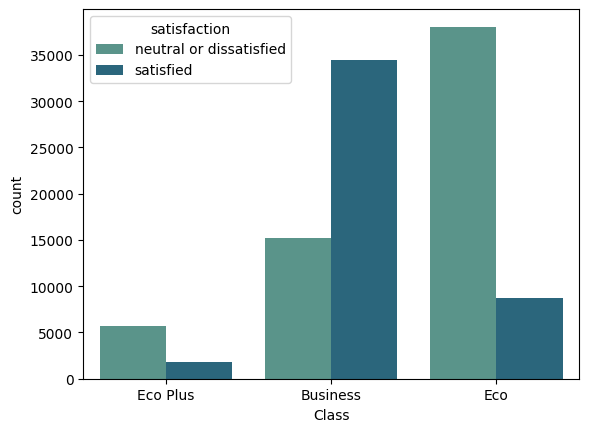

In [191]:
sns.countplot(x=df['Class'],hue='satisfaction',data=df,palette = "crest")


Here we can see that satisfied people from the business class are almost the double

However, we can also see that most people from the economy class are unsatisfied

<Axes: xlabel='Flight Distance', ylabel='Count'>

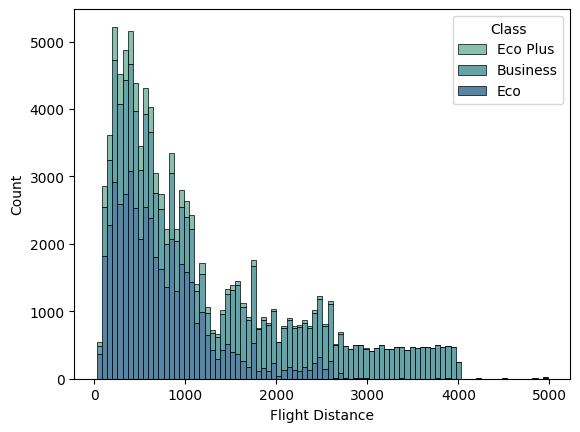

In [192]:
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "crest", linewidth = .5)

# Encoding

Most people travelling short distance use economy class but as the distance increases people tend more to use business class

Now, I will make a function for the first type of encoding which is called One Hot Encoder. I will use it to classify binary categorical features

In [193]:
def ohe_transform(df,*args):
    ohe = OneHotEncoder()
    transf=ohe.fit_transform(df[[*args]])
    df_encoded = pd.DataFrame(transf.toarray(), columns=ohe.get_feature_names_out([*args]))
    print(df_encoded.shape)
    df = pd.concat([df, df_encoded], axis=1)

    return df


In [194]:
df = ohe_transform(df,'Type of Travel','Gender','Customer Type')


(103904, 6)


Now, After Assigning the encoding to new columns, I will delete the old columns

In [195]:
df.drop('Type of Travel',axis=1,inplace=True)
df.drop('Gender',axis=1,inplace=True)
df.drop('Customer Type',axis=1,inplace=True)


I will encode the class feature using ordinal encoding to give advantage to the business over the eco plus and eco class

In [196]:
def Class_transform(df,Class):
    oe = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
    df[[Class]] = oe.fit_transform(df[[Class]])
    return df

In [197]:
df = Class_transform(df,'Class')

In [198]:
df['Class'].value_counts()

Class
2.0    49665
0.0    46745
1.0     7494
Name: count, dtype: int64

I will encode the satisfaction using the comprehensive list to make sure the output will be in one column only

In [199]:
df["satisfaction"]=[1 if i=="satisfied" else 0 for i in df["satisfaction"]]
df["satisfaction"].unique()

array([0, 1], dtype=int64)

# Remove Outliers

I will remove the outliers from this dataset

In [200]:
for column in df.columns:
    
    if df[column].nunique() > 100:
        
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_whisker = q1 - 1.5 * iqr
        upper_whisker = q3 + 1.5 * iqr
        if lower_whisker < 0:
            lower_whisker = 0
        filt_lower = df[column] < lower_whisker
        filt_upper = df[column] > upper_whisker
        filt = filt_lower | filt_upper
        df = df.drop(df[filt].index, axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75372 entries, 1 to 103903
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                75372 non-null  int64  
 1   Class                              75372 non-null  float64
 2   Flight Distance                    75372 non-null  int64  
 3   Inflight wifi service              75372 non-null  int64  
 4   Departure/Arrival time convenient  75372 non-null  int64  
 5   Ease of Online booking             75372 non-null  int64  
 6   Gate location                      75372 non-null  int64  
 7   Food and drink                     75372 non-null  int64  
 8   Online boarding                    75372 non-null  int64  
 9   Seat comfort                       75372 non-null  int64  
 10  Inflight entertainment             75372 non-null  int64  
 11  On-board service                   75372 non-null  int64  

# Check Balanced Data

In [201]:
df['satisfaction'].value_counts()

satisfaction
0    41306
1    34066
Name: count, dtype: int64

The data is almost balanced so no need to rebalance the data

Now, I will try to apply some feature selections techniques to extract the best features in the data

<Axes: >

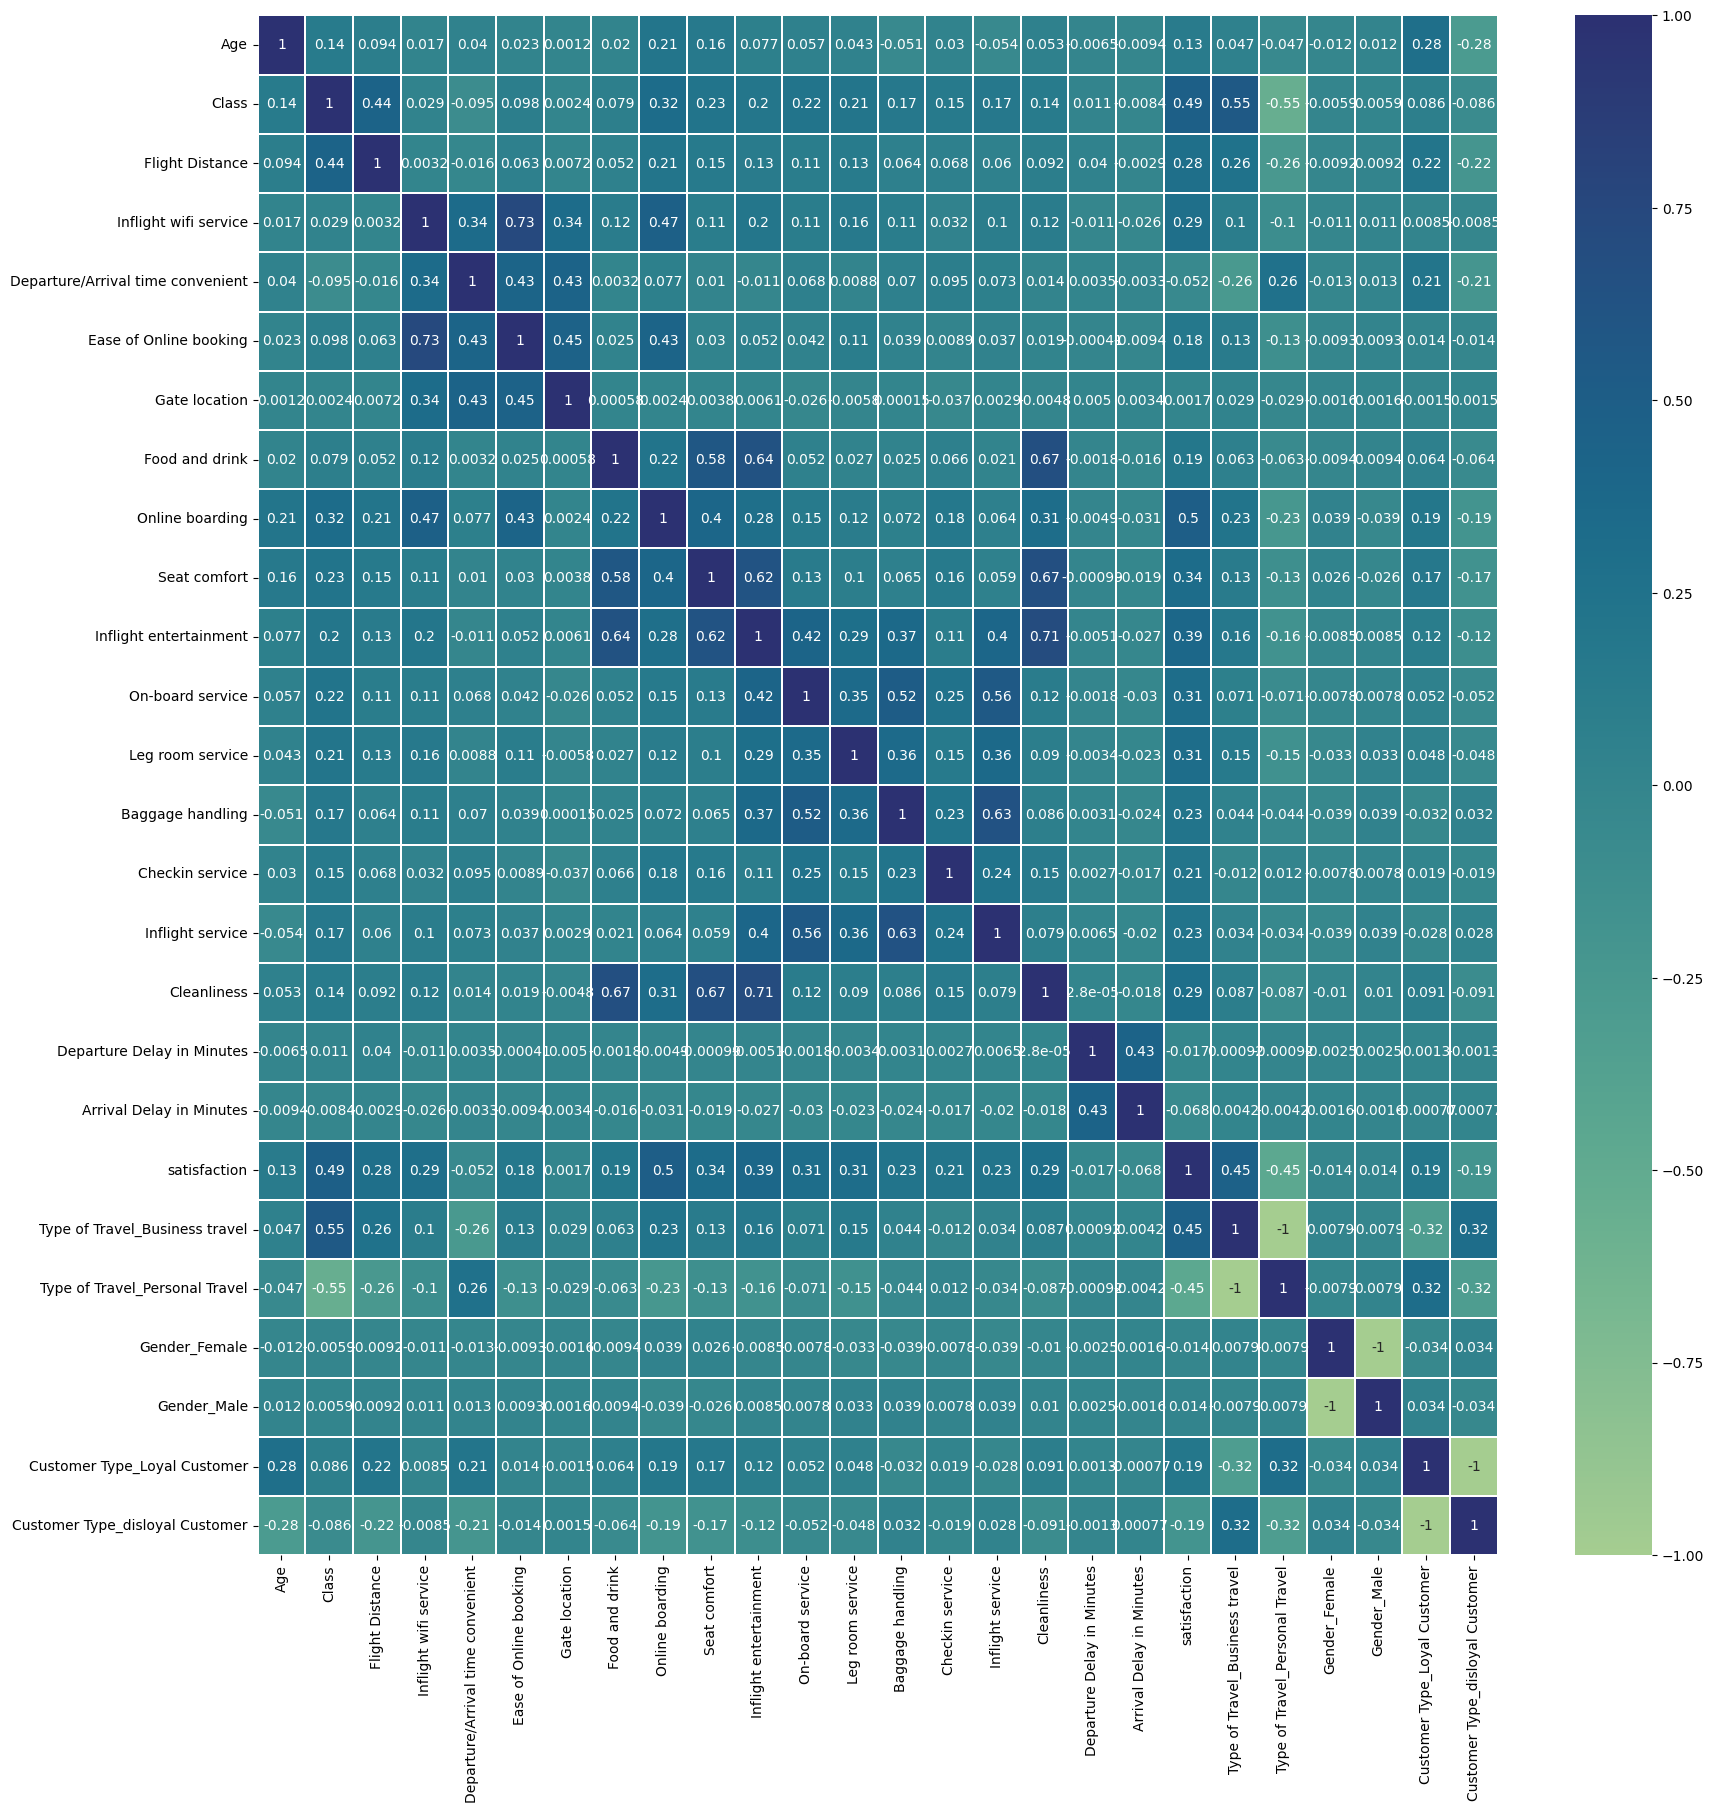

In [202]:
corr=df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr,cmap="crest",annot=True,linewidths=0.1)

# Splitting the Data

Now, I will split my model to x and y

In [203]:
x = df.drop('satisfaction',axis = 1)
y = df['satisfaction']

I will split my data to training, validation and test set

In [204]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Scaling the data

In [205]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test=scaler.transform(x_test)

# Feature Selection

Since some of the features are numerical and other are categorical, I will use Anova to get the best features for my model

In [206]:
fsm=SelectKBest(f_classif,k=10)
fsm.fit(x_train,y_train)

x_train_selected=fsm.transform(x_train)
x_val_selected = fsm.transform(x_val)
x_test_selected=fsm.transform(x_test)

In [207]:
mask=fsm.get_support()
mask

array([False,  True, False,  True, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False,  True,  True, False, False, False, False])

In [208]:
selected_features_index=pd.DataFrame(x_train).columns[mask]
selected_features_index

Index([1, 3, 8, 9, 10, 11, 12, 16, 19, 20], dtype='int64')

In [209]:
df.drop('satisfaction',axis=1).columns[selected_features_index]

Index(['Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Cleanliness', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel'],
      dtype='object')

# Logistic Regression

Now, I will apply logistic regression model

In [210]:
LR_model = LogisticRegression()
LR_model.fit(x_train_selected,y_train)


LogisticRegression()

# Check Overfitting

In [211]:
y_val_predict = LR_model.predict(x_val_selected)

In [212]:
print(accuracy_score(y_val_predict,y_val))

0.8479270315091211


# Evaluation

In [213]:
y_pred = LR_model.predict(x_test_selected)
LR_score = accuracy_score(y_pred,y_test)
LR_recall = recall_score(y_pred,y_test)
LR_precision = precision_score(y_pred,y_test)
LR_f1 = f1_score(y_pred,y_test)


In [214]:
print(f'acurracy = {LR_score}')
print(f'recall = {LR_recall}')
print(f'precision = {LR_precision}')
print(f'f1 = {LR_f1}')

acurracy = 0.8439800995024875
recall = 0.8356205700497662
precision = 0.8144936057621638
f1 = 0.8249218401071907


looks like no overfitting so we are all good

<Axes: >

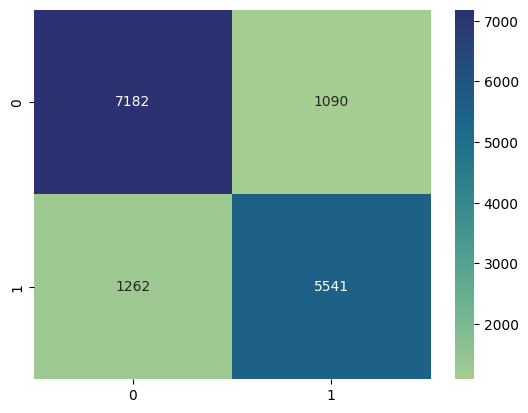

In [215]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='crest',annot=True,fmt='d')

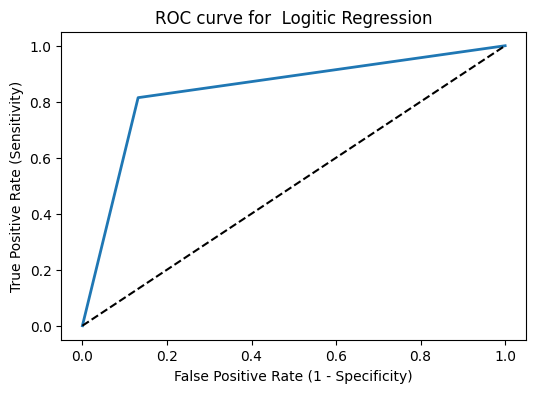

In [216]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for  Logitic Regression')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

Ummmmm, Not the best score. I think other complex models will be better

# Decision Tree Classifier

In [217]:
DTC = DecisionTreeClassifier()

# Grid Search
Let's do grid search to find the best hyper parameters

In [218]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

In [219]:
grid = GridSearchCV(
    estimator=DTC,
    param_grid=params,
    cv= 5,
    scoring='accuracy',
    n_jobs=-1
)

In [220]:
grid.fit(x_train_selected,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [221]:
grid.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=99, min_samples_split=3)

In [222]:
DTC= DecisionTreeClassifier(max_leaf_nodes=99)

In [223]:
DTC.fit(x_train_selected,y_train)

DecisionTreeClassifier(max_leaf_nodes=99)

# Check Overfitting

In [224]:
y_val_predict = DTC.predict(x_val_selected)
print(accuracy_score(y_val_predict,y_val))

0.937893864013267


In [225]:
y_pred = DTC.predict(x_test_selected)

# Evaluation

In [226]:
DTC_score = accuracy_score(y_pred,y_test)
DTC_recall = recall_score(y_pred,y_test)
DTC_precision = precision_score(y_pred,y_test)
DTC_f1 = f1_score(y_pred,y_test)


In [227]:
print(f'acurracy = {DTC_score}')
print(f'recall = {DTC_recall}')
print(f'precision = {DTC_precision}')
print(f'f1 = {DTC_f1}')

acurracy = 0.9330016583747927
recall = 0.9447259327498848
precision = 0.9044539173893871
f1 = 0.9241513968158608


no overfitting

<Axes: >

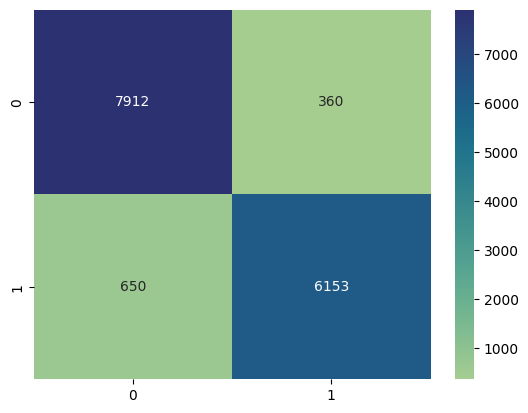

In [228]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='crest',annot=True,fmt='d')

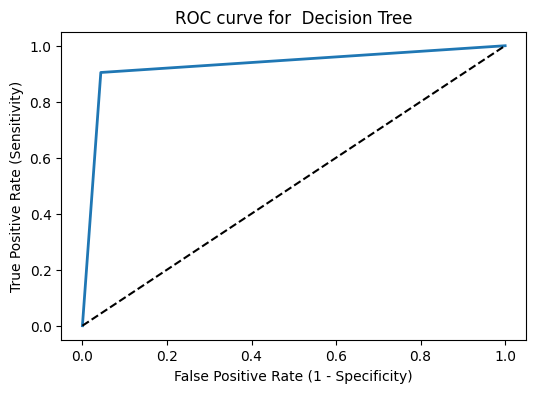

In [229]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for  Decision Tree')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

Much better choice but lets visualize the tree first

In [230]:
feature_name = [str(i) for i in x.columns]
class_name = df['satisfaction'].unique().astype(str).tolist()

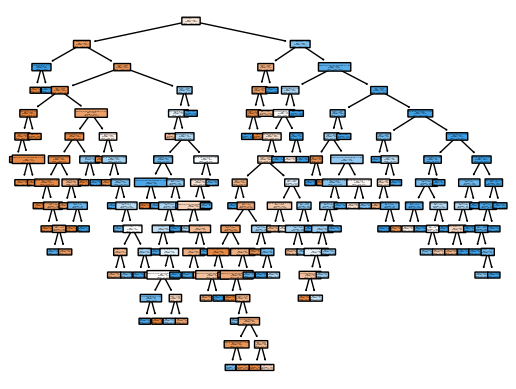

In [231]:
plot_tree(
    DTC,
    feature_names=feature_name ,
    class_names= class_name,
    filled=True,
    rounded=True
)
plt.savefig('tree.png')

Uhhhhhh, Not cool. Right?

# K Nearest Neighbour

In [232]:
KNN = KNeighborsClassifier()
params = {'n_neighbors': list(range(1,31))}

# Grid Search
to find best hyperparameters

In [233]:
grid = GridSearchCV(
    estimator= KNN,
    param_grid=params,
    scoring='accuracy',
    n_jobs= -1,
    cv = 5
)

In [234]:
grid.fit(x_train_selected,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [235]:
grid.best_params_

{'n_neighbors': 5}

In [236]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train_selected,y_train)

KNeighborsClassifier()

# Check Overfitting

In [237]:
y_val_predict = KNN.predict(x_val_selected)
print(accuracy_score(y_val_predict,y_val))

0.9275290215588723


# Evaluation

In [238]:
y_pred = KNN.predict(x_test_selected)

In [239]:
KNN_score = accuracy_score(y_pred,y_test)
KNN_recall = recall_score(y_pred,y_test)
KNN_precision = precision_score(y_pred,y_test)
KNN_f1 = f1_score(y_pred,y_test)

In [240]:
print(f'acurracy = {KNN_score}')
print(f'recall = {KNN_recall}')
print(f'precision = {KNN_precision}')
print(f'f1 = {KNN_f1}')

acurracy = 0.9215257048092869
recall = 0.9290076335877863
precision = 0.8944583272085844
f1 = 0.9114056766269752


no overfitting

<Axes: >

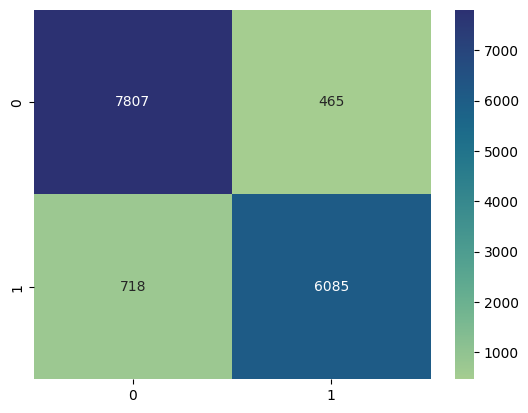

In [241]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='crest',annot=True,fmt='d')

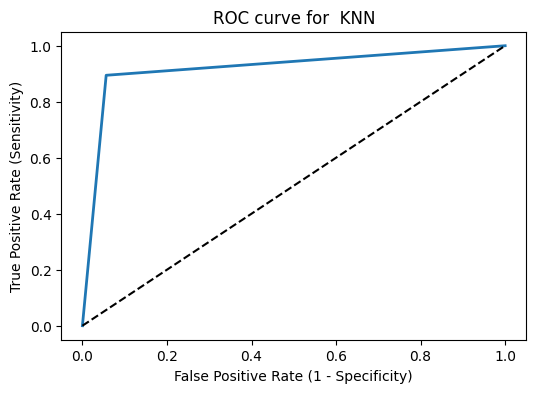

In [242]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for  KNN')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Support Vector Classifier

In [243]:
model = SVC()

# Grid Search

In [244]:
param_distributions = {
  'C':  [0.1, 1, 10],
  'kernel': ['linear', 'rbf'],
  'gamma': ['scale', 'auto']
}

In [245]:
grid = GridSearchCV(
    estimator=model,
    param_grid=param_distributions,
    cv= 5,
    scoring='accuracy',
    n_jobs=-1
)

In [246]:
grid.fit(x_train_selected,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [247]:
grid.best_estimator_

SVC(C=10, gamma='auto')

In [259]:
model = SVC(C=10,gamma='auto')

In [260]:
model.fit(x_train_selected,y_train)

SVC(C=10, gamma='auto')

# Check Overfitting

In [261]:
y_val_predict = model.predict(x_val_selected)
print(accuracy_score(y_val_predict,y_val))

0.936318407960199


# Evaluation

In [262]:
y_pred = model.predict(x_test_selected)
SVC_score = accuracy_score(y_pred,y_test)
SVC_recall = recall_score(y_pred,y_test)
SVC_precision = precision_score(y_pred,y_test)
SVC_f1 = f1_score(y_pred,y_test)

In [263]:
print(f'acurracy = {SVC_score}')
print(f'recall = {SVC_recall}')
print(f'precision = {SVC_precision}')
print(f'f1 = {SVC_f1}')

acurracy = 0.9335986733001659
recall = 0.9379528985507246
precision = 0.9132735557842129
f1 = 0.9254487227228718


no overfitting

<Axes: >

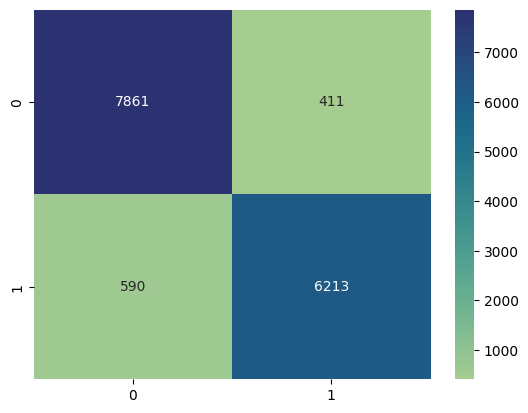

In [264]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='crest',annot=True,fmt='d')

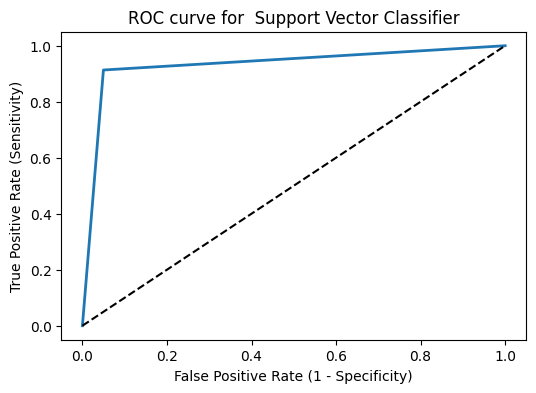

In [265]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for  Support Vector Classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Bagging

Now lets try the bagging classifier method with decision tree 

In [266]:
BagClf = BaggingClassifier()

# Grid Search

In [267]:
params = { 'n_estimators':[20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [268]:
grid = GridSearchCV(
    estimator=BagClf,
    param_grid=params,
    cv= 5,
    scoring='accuracy',
    n_jobs=-1
)

In [269]:
grid.fit(x_train_selected,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [20, 50, 100, 200, 300, 400, 500, 600,
                                          700, 800, 900, 1000]},
             scoring='accuracy')

In [270]:
grid.best_estimator_

BaggingClassifier(n_estimators=600)

In [281]:
bag_class=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=600,
    bootstrap=True,
    n_jobs=-1
)

In [282]:
bag_class.fit(x_train_selected,y_train)

C:\Users\Youssef\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=600,
                  n_jobs=-1)

# Check overfitting

In [283]:
y_val_predict = bag_class.predict(x_val_selected)
print(accuracy_score(y_val_predict,y_val))

0.9371475953565506


# Evaluation

In [284]:
y_pred = bag_class.predict(x_test_selected)
Bag1_score = accuracy_score(y_pred,y_test)
Bag1_recall = recall_score(y_pred,y_test)
Bag1_precision = precision_score(y_pred,y_test)
Bag1_f1 = f1_score(y_pred,y_test)

In [285]:
print(f'acurracy = {Bag1_score}')
print(f'recall = {Bag1_recall}')
print(f'precision = {Bag1_precision}')
print(f'f1 = {Bag1_f1}')

acurracy = 0.9337313432835821
recall = 0.931460005947071
precision = 0.9209172423930618
f1 = 0.9261586222189371


no overfitting

In [286]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[7811,  461],
       [ 538, 6265]], dtype=int64)

<Axes: >

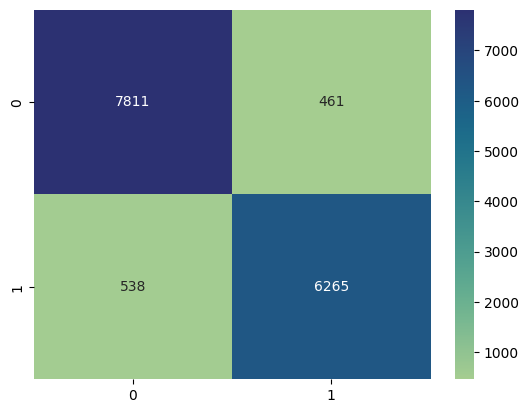

In [287]:
sns.heatmap(cm,cmap='crest',annot=True,fmt='d')

Now we will try bagging but using different models

In [288]:
estimator=[('lr',LogisticRegression())   ,    ('tree',DecisionTreeClassifier())]

voting_clf=VotingClassifier(estimators=estimator)

bagging_2=BaggingClassifier(
    base_estimator=voting_clf,
    n_estimators=10
                  )

In [289]:
grid = GridSearchCV(
    estimator=bagging_2,
    param_grid=params,
    cv= 5,
    scoring='accuracy',
    n_jobs=-1
)

In [290]:
grid.fit(x_train_selected,y_train)

C:\Users\Youssef\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=VotingClassifier(estimators=[('lr',
                                                                                      LogisticRegression()),
                                                                                     ('tree',
                                                                                      DecisionTreeClassifier())])),
             n_jobs=-1,
             param_grid={'n_estimators': [20, 50, 100, 200, 300, 400, 500, 600,
                                          700, 800, 900, 1000]},
             scoring='accuracy')

In [291]:
grid.best_estimator_

BaggingClassifier(base_estimator=VotingClassifier(estimators=[('lr',
                                                               LogisticRegression()),
                                                              ('tree',
                                                               DecisionTreeClassifier())]),
                  n_estimators=500)

In [292]:
bagging_2=BaggingClassifier(
    base_estimator=voting_clf,
    n_estimators=10
                  )

In [293]:
bagging_2.fit(x_train_selected,y_train)

C:\Users\Youssef\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=VotingClassifier(estimators=[('lr',
                                                               LogisticRegression()),
                                                              ('tree',
                                                               DecisionTreeClassifier())]))

# Check Overfitting

In [294]:
y_val_pred=bagging_2.predict(x_val_selected)
print(accuracy_score(y_val_predict,y_val))

0.9371475953565506


# Evaluation

In [295]:
y_pred = bagging_2.predict(x_test_selected)
acc_bag2=accuracy_score(y_pred,y_test)
recall_bag2=recall_score(y_pred,y_test)
precision_bag2=precision_score(y_pred,y_test)
f1_bag2=f1_score(y_pred,y_test)

In [296]:
print(f'accuracy : {acc_bag2}')
print(f'recall =  {recall_bag2}')
print(f'precision =  {precision_bag2}')
print(f'f1 =  {f1_bag2}')

accuracy : 0.8855721393034826
recall =  0.9548548907201719
precision =  0.7834778774070263
f1 =  0.860718611223254


In [297]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[8020,  252],
       [1473, 5330]], dtype=int64)

<Axes: >

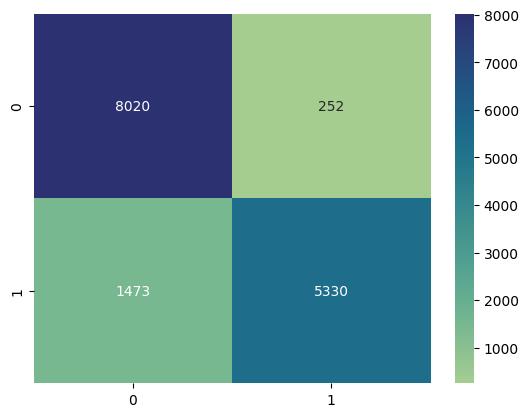

In [298]:
sns.heatmap(cm,cmap='crest',annot=True,fmt='d')

# Random Forest Classifier

In [299]:
clf=RandomForestClassifier()

# Grid search

In [300]:
params = {
    'n_estimators': [100,200,300,400,500,600,700,800]
}

In [301]:
grid = GridSearchCV(
    estimator=clf,
    param_grid=params,
    cv= 5,
    scoring='accuracy',
    n_jobs=-1
)

In [302]:
grid.fit(x_train_selected,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800]},
             scoring='accuracy')

In [303]:
grid.best_estimator_

RandomForestClassifier(n_estimators=400)

In [346]:
clf=RandomForestClassifier(
    n_estimators=400,random_state=42
)
clf.fit(x_train_selected,y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

# Check Overfitting

In [347]:
y_val_pred=clf.predict(x_val_selected)
print(accuracy_score(y_val_predict,y_val))

0.9371475953565506


In [348]:
y_pred=clf.predict(x_test_selected)
acc_clf=accuracy_score(y_pred,y_test)
recall_clf=recall_score(y_pred,y_test)
precision_clf=precision_score(y_pred,y_test)
f1_clf=f1_score(y_pred,y_test)

In [349]:
print(f'accuracy : {acc_clf}')
print(f'recall =  {recall_clf}')
print(f'precision =  {precision_clf}')
print(f'f1 =  {f1_clf}')

accuracy : 0.9346600331674959
recall =  0.934049537451507
precision =  0.9201822725268264
f1 =  0.9270640503517216


In [350]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[7830,  442],
       [ 543, 6260]], dtype=int64)

<Axes: >

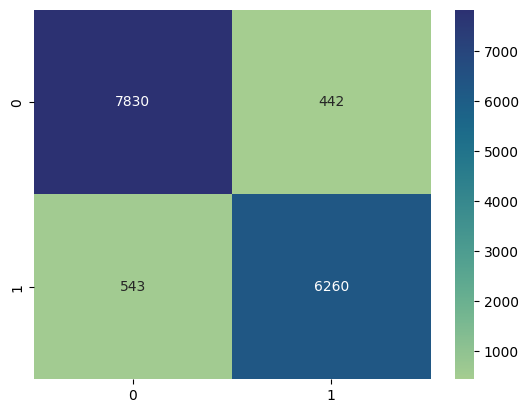

In [351]:
sns.heatmap(cm,cmap='crest',annot=True,fmt='d')

# Boosting method
# Adaptive boosting

In [310]:
ada_model= AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=7),
    n_estimators=200,
    learning_rate=.5,
    random_state=42
)

In [311]:
ada_model.fit(x_train_selected,y_train)

C:\Users\Youssef\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                   learning_rate=0.5, n_estimators=200, random_state=42)

# Check overfitting

In [312]:
y_val_pred=ada_model.predict(x_val_selected)
print(accuracy_score(y_val_predict,y_val))

0.9371475953565506


# Evaluation

In [313]:
y_pred=ada_model.predict(x_test_selected)
acc_ada=accuracy_score(y_pred,y_test)
recall_ada=recall_score(y_pred,y_test)
precision_ada=precision_score(y_pred,y_test)
f1_ada=f1_score(y_pred,y_test)

In [314]:
print(f'accuracy : {acc_ada}')
print(f'recall =  {recall_ada}')
print(f'precision =  {precision_ada}')
print(f'f1 =  {f1_ada}')

accuracy : 0.9332669983416252
recall =  0.931003717472119
precision =  0.9203292665000735
f1 =  0.9256357185097577


In [315]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

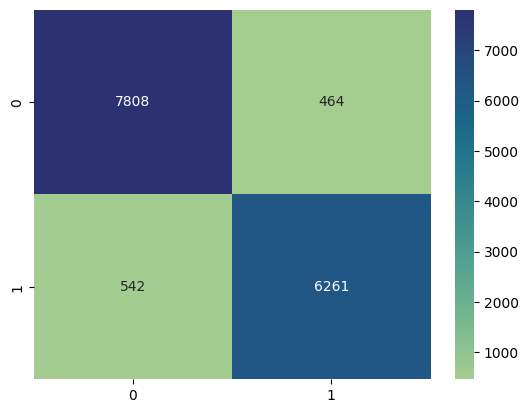

In [316]:
sns.heatmap(cm,cmap='crest',annot=True,fmt='d')

# Gradient Boost

In [317]:
GB=GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=.5,
    random_state=40
)

In [318]:
GB.fit(x_train_selected,y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, random_state=40)

# Check overfitting

In [319]:
y_val_pred=GB.predict(x_val_selected)
print(accuracy_score(y_val_predict,y_val))

0.9371475953565506


# Evaluation

In [320]:
y_pred=GB.predict(x_test_selected)
acc_GB=accuracy_score(y_pred,y_test)
recall_GB=recall_score(y_pred,y_test)
precision_GB=precision_score(y_pred,y_test)
f1_GB=f1_score(y_pred,y_test)

In [321]:
print(f'accuracy : {acc_GB}')
print(f'recall =  {recall_GB}')
print(f'precision =  {precision_GB}')
print(f'f1 =  {f1_GB}')

accuracy : 0.9371144278606965
recall =  0.9440315486121644
precision =  0.9148904894899309
f1 =  0.929232606748283


In [322]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[7903,  369],
       [ 579, 6224]], dtype=int64)

<Axes: >

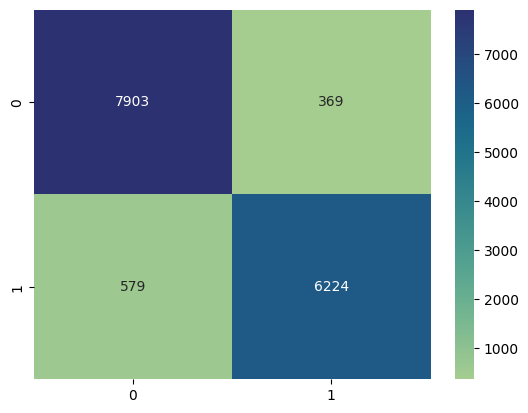

In [323]:
sns.heatmap(cm,cmap='crest',annot=True,fmt='d')

# Xtreme Gradient Boost

In [324]:
XG=xgb.XGBClassifier(objective='binary:logistic',random_state=42)

In [325]:
XG.fit(x_train_selected,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

# Check Overfitting

In [326]:
y_val_pred=XG.predict(x_val_selected)

# Evaluation

In [327]:
y_pred=XG.predict(x_test_selected)
acc_XG=accuracy_score(y_pred,y_test)
recall_XG=recall_score(y_pred,y_test)
precision_XG=precision_score(y_pred,y_test)
f1_XG=f1_score(y_pred,y_test)

In [328]:
print(f'accuracy : {acc_XG}')
print(f'recall =  {recall_XG}')
print(f'precision =  {precision_XG}')
print(f'f1 =  {f1_XG}')

accuracy : 0.9397678275290215
recall =  0.9442351168048229
precision =  0.9209172423930618
f1 =  0.93243042119363


In [329]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[7902,  370],
       [ 538, 6265]], dtype=int64)

<Axes: >

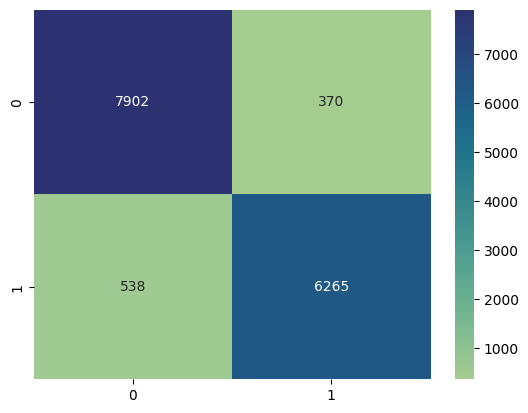

In [330]:
sns.heatmap(cm,cmap='crest',annot=True,fmt='d')

# Stacking Method

In [331]:
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())
]

model_stack=StackingClassifier(estimators=base_models,final_estimator=LogisticRegression())

In [332]:
model_stack.fit(x_train_selected,y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

# Check Overfitting

In [333]:
y_val_pred=model_stack.predict(x_val_selected)

# Evaluation

In [334]:
y_pred=model_stack.predict(x_test_selected)
acc_stack=accuracy_score(y_pred,y_test)
recall_stack=recall_score(y_pred,y_test)
precision_stack=precision_score(y_pred,y_test)
f1_stack=f1_score(y_pred,y_test)

In [335]:
print(f'accuracy : {acc_stack}')
print(f'recall =  {recall_stack}')
print(f'precision =  {precision_stack}')
print(f'f1 =  {f1_stack}')

accuracy : 0.9349917081260365
recall =  0.934098702847771
precision =  0.9209172423930618
f1 =  0.927461139896373


In [336]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[7830,  442],
       [ 538, 6265]], dtype=int64)

<Axes: >

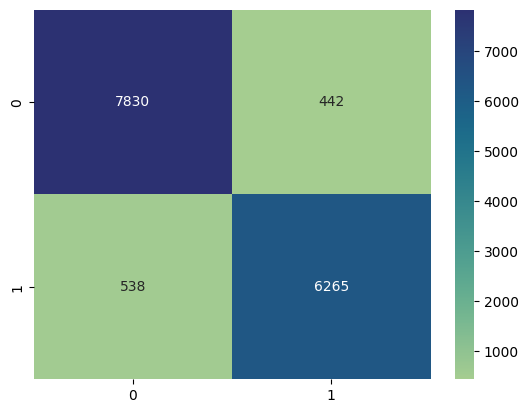

In [337]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='crest',annot=True,fmt='d')

# Naive Bayes

In [338]:
NB = GaussianNB()
NB.fit(x_train_selected, y_train)

GaussianNB()

# Check Overfitting

In [339]:
y_val_pred = NB.predict(x_val_selected)
print(accuracy_score(y_val_pred,y_val))

0.8359038142620232


# Evaluation

In [340]:
y_pred = NB.predict(x_test_selected)
acc_NB=accuracy_score(y_pred,y_test)
recall_NB=recall_score(y_pred,y_test)
precision_NB=precision_score(y_pred,y_test)
f1_NB=f1_score(y_pred,y_test)

In [341]:
print(f'accuracy : {acc_NB}')
print(f'recall =  {recall_NB}')
print(f'precision =  {precision_NB}')
print(f'f1 =  {f1_NB}')

accuracy : 0.8312437810945273
recall =  0.7905580570337017
precision =  0.8516830809936793
f1 =  0.8199830172657798


<Axes: >

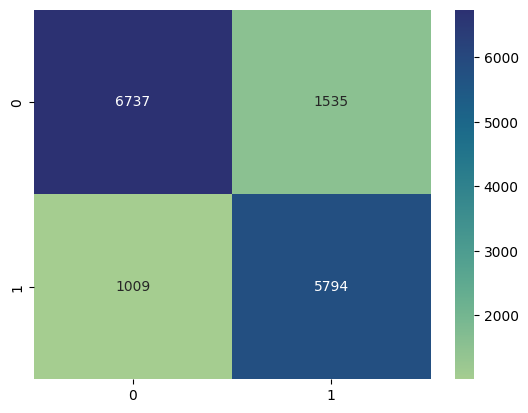

In [342]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='crest',annot=True,fmt='d')

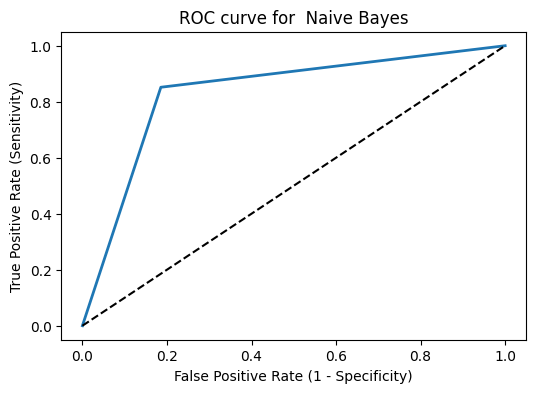

In [343]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for  Naive Bayes')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Evaluation between all methods used

In [352]:
models_names=["Logistic Regression","TREE","KNN","SVC","Bagging","bagging2","Random_forest","Ada","Gradient_boosting","XG","stacking","Naive"]
models_scores=[LR_score,DTC_score,KNN_score,SVC_score,Bag1_score,acc_bag2,acc_clf,acc_ada,acc_GB,acc_XG,acc_stack,acc_NB]

Text(0, 0.5, 'Accuracy')

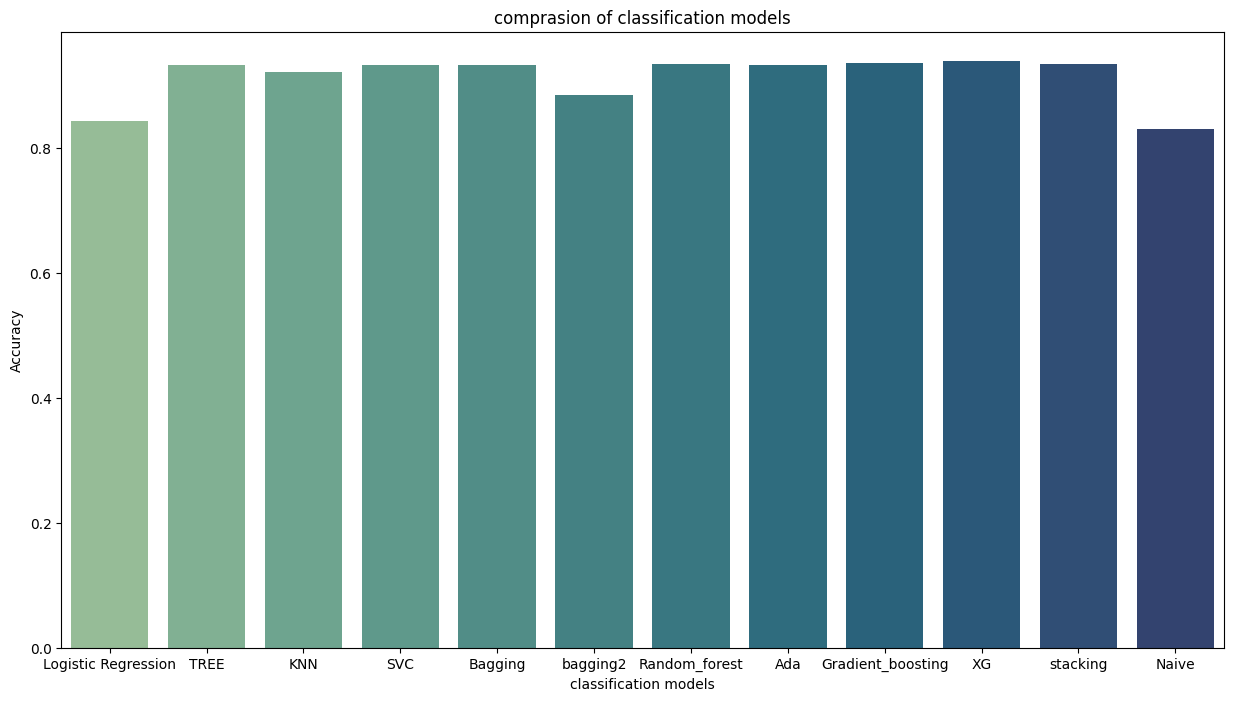

In [354]:
plt.figure(figsize=(15, 8))
sns.barplot(x=models_names, y=models_scores, data=df,palette='crest')
plt.title('comprasion of classification models')
plt.xlabel('classification models')
plt.ylabel('Accuracy')

Looks like SVC,Random_forest,Ada,Gradient_boosting,XG where the best classifier algorithms to use.


However, Naive Bayes was the worst fit.